In [26]:
import gym
import collections
import itertools
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np
import pandas as pd
import time
from IPython.display import clear_output

In [2]:
env = gym.make('Taxi-v3')
print(env.action_space)
print(env.observation_space)
state = env.reset()
env.render()
x = env.decode(state)
for i in x:
    print(i)

Discrete(6)
Discrete(500)
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

3
1
3
2


In [3]:
class SARSAagent:
    def __init__(self, env, gamma=0.9, learning_rate=0.1, epsilon=0.1):
        self.gamma = gamma
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.action_n = env.action_space.n
        self.q_table = np.zeros((env.observation_space.n, env.action_space.n))
        
        
    def use_epsilon_greedy_policy(self, state):
        if np.random.uniform() > self.epsilon:
            action = np.argmax(self.q_table[state])
        else:
            action = np.random.randint(self.action_n)
        return action
    
    
    def learn(self, state, action, reward, next_state, next_action, done):
        td_target = reward + self.gamma * self.q_table[next_state][next_action] * (1. - done)
        td_error = td_target - self.q_table[state][action]
        self.q_table[state][action] += self.learning_rate * td_error

In [21]:
def execute_SARSA_one_episode(env, agnet, render = False):
    total_steps, total_rewards = 0.0, 0.0
    state = env.reset()
    action = agent.use_epsilon_greedy_policy(state)
    while True:
        if render:
            env.render()
            clear_output(wait=True)
            time.sleep(0.02)
        next_state, reward, done, _ = env.step(action)
        total_steps += 1.
        total_rewards += reward
        next_action = agent.use_epsilon_greedy_policy(next_state)
        agent.learn(state, action, reward, next_state, next_action, done)
        if done:
            if render:
                clear_output(wait=True)
                print('END')
                print('total_steps: ', total_steps)
                time.sleep(3)
            break
        else:
            state, action = next_state, next_action
    return total_steps, total_rewards

In [32]:
agent = SARSAagent(env)
result = [execute_SARSA_one_episode(env, agent, render=False) for _ in range(5000)]
unziped_resutl = list(zip(*result))
steps = list(unziped_resutl[0])
rewards = list(unziped_resutl[1])

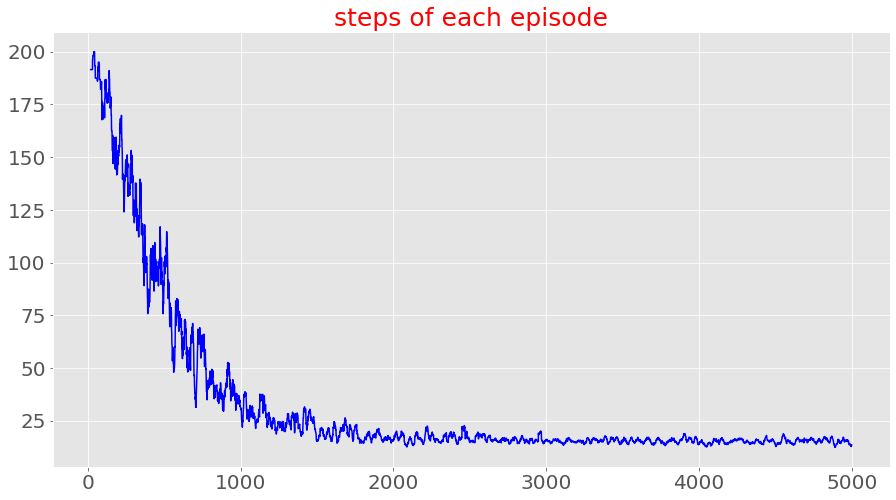

In [6]:
steps_smoothed = pd.Series(steps).rolling(20, min_periods=20).mean()
plt.figure(figsize=(15, 8))
plt.title('steps of each episode', fontsize=25, color='r')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(steps_smoothed, color='b')
plt.savefig('SARSA_steps_of_each_episode.png')

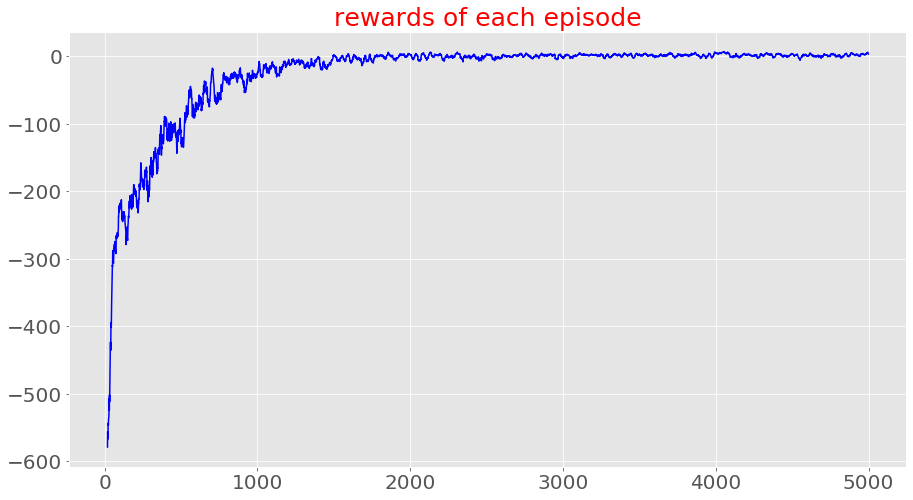

In [7]:
rewards_smoothed = pd.Series(rewards).rolling(20,20).mean()
plt.figure(figsize=(15, 8))
plt.title('rewards of each episode', fontsize=25, color='r')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(rewards_smoothed, color='b')
plt.savefig('SARSA_rewards_of_each_episode.png')

In [8]:
pd.DataFrame(agent.q_table)

,0,1,2,3,4,5
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-3.985126,-3.424446,-4.072099,-3.732169,-1.682856,-8.041540
2,-1.466943,0.117121,0.119486,0.656357,4.190408,-4.835304
3,-3.140358,-2.997036,-3.705371,-2.777566,-0.355685,-8.073674
4,-6.745418,-6.919960,-6.771730,-6.735160,-9.493358,-10.074422
...,...,...,...,...,...,...
495,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
496,-2.881833,-2.833192,-2.878966,-2.271016,-3.764418,-3.745854
497,-1.783886,-1.318232,-1.769246,-0.026576,-1.909000,-2.861079
498,-3.281427,-3.167514,-3.254752,-2.458533,-4.899401,-4.452290


In [9]:
policy = np.eye(agent.action_n)[agent.q_table.argmax(axis=-1)]
policy

array([[1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.]])

In [46]:
agent.epsilon = 0.0
test_results = [execute_SARSA_one_episode(env, agent) for _ in range(1000)]
test_unzipped_results = list(zip(*test_results))
steps = test_unzipped_results[0]
rewards = test_unzipped_results[1]
print('average steps per episode: ', sum(steps) / len(steps))

average steps per episode:  13.159
